# Telco Customer Churn - Data Inspection & EDA

## Load Raw Data

In [3]:
import pandas as pd

In [6]:
DATA_PATH = '../data/raw/Telco_Customer_Churn.csv'

In [7]:
df = pd.read_csv(DATA_PATH)

In [13]:
#df.head()

In [12]:
#df.describe(include='all')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['Churn'].value_counts() # Check the distribution of the target variable

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
df["customerID"].nunique(), len(df) # Check for duplicate customer IDs to ensure data integrity

(7043, 7043)

In [20]:
df.dtypes # Conceptually TotalCharges should be numeric

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.isna().sum() # Check for missing values , explicit nan's

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Initial Hypotheses

Based on schema inspection:

- Customers with low tenure may churn more
- Month-to-month contracts likely increase churn risk
- Customers without security or support services may churn
- Higher monthly charges may increase churn probability
- Certain payment methods may correlate with churn


### Conclusions for Preprocessing

- `customerID` is an identifier and should be removed
- `Churn` must be encoded as a binary target
- `TotalCharges` requires type correction
- Categorical and numerical features must be handled separately
- Class imbalance must be considered during modeling


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')

In [23]:
df.shape

(7043, 21)

In [24]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

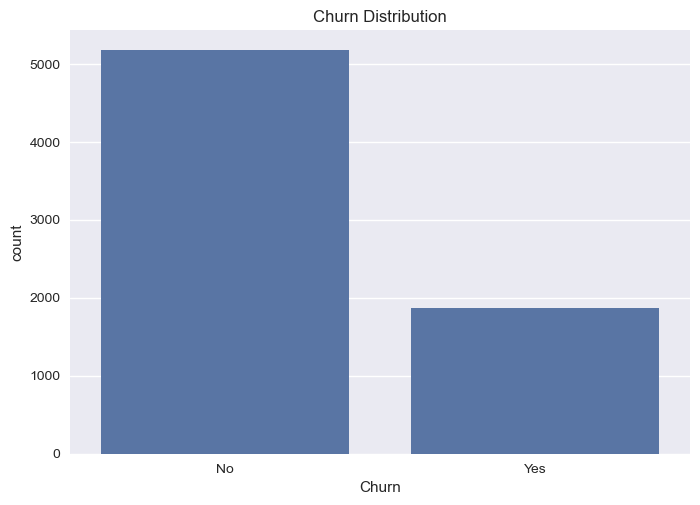

In [25]:
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution') # Visualize churn vs key features
plt.show()

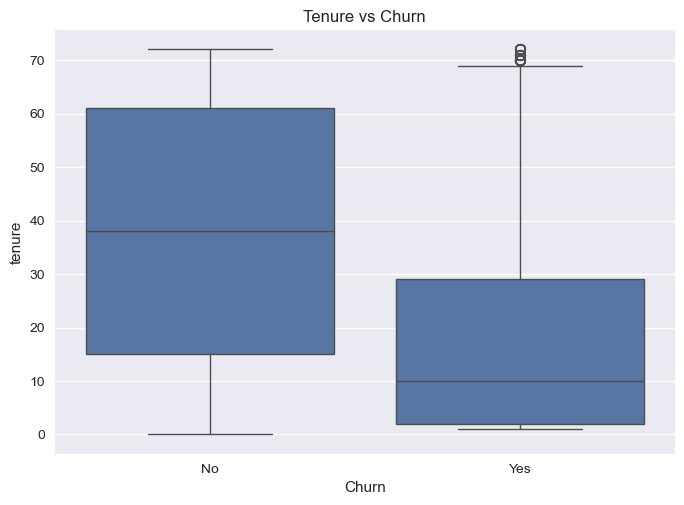

In [26]:
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure vs Churn')
plt.show()

### Business Insights
- Short Tenure customers churn more

### EDA Findings

- Dataset contains customer demographics, services, and billing info

- Target variable Churn is binary and moderately imbalanced

- customerID is a unique identifier and non-predictive

- Numerical features vary in scale

- Some columns require type correction and encoding